**HOMEWORK3**

**Boston Housing Price dataset to build a linear
regression model**

**PART1**

In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
housing_data = pd.read_csv(url)

In [41]:
housing_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
housing_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
print(housing_data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


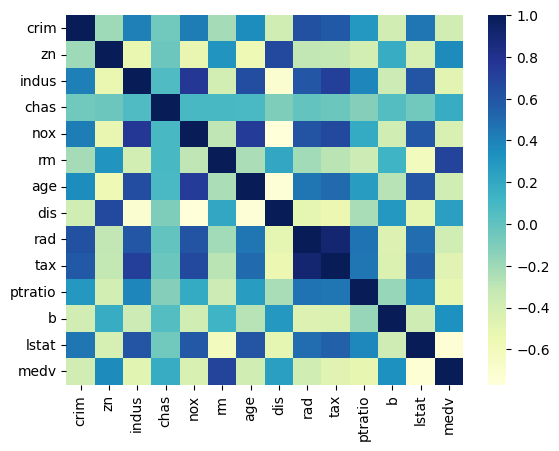

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = housing_data.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [45]:
# removing 'age' column since it is less correlated with 'medv' than 'lstat'
housing_data.drop('age', axis=1, inplace=True)

In [46]:
# droping 'chas' and 'rad' columns since they have low correlation with 'medv'
corr_with_medv = housing_data.corrwith(housing_data['medv']).abs()
low_corr_cols = corr_with_medv[corr_with_medv < 0.2].index.tolist()
housing_data.drop(low_corr_cols, axis=1, inplace=True)


**PART2**

In [47]:
from sklearn.model_selection import train_test_split

X = housing_data.drop('medv', axis=1)
y = housing_data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
rmse_scores = -scores # making the scores negative to get positive RMSE values
print("Mean RMSE: {:.2f}".format(rmse_scores.mean()))
print("SD of RMSE: {:.2f}".format(rmse_scores.std()))

Mean RMSE: 4.84
SD of RMSE: 0.90


In [50]:
y_pred = lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE: {:.2f}".format(rmse))

Test RMSE: 4.95


**PART3**

In [51]:
import pandas as pd

housing_data_copy = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
housing_data_copy = housing_data_copy.fillna(housing_data_copy.mean()).copy()

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(housing_data_copy.drop('medv', axis=1))
y = housing_data_copy['medv']

In [53]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [54]:
import numpy as np
print("Explained variance ratio:")
print(np.round(pca.explained_variance_ratio_, 3))

Explained variance ratio:
[0.471 0.11  0.096 0.066 0.064 0.051 0.041 0.03  0.021 0.017 0.014 0.013
 0.005]


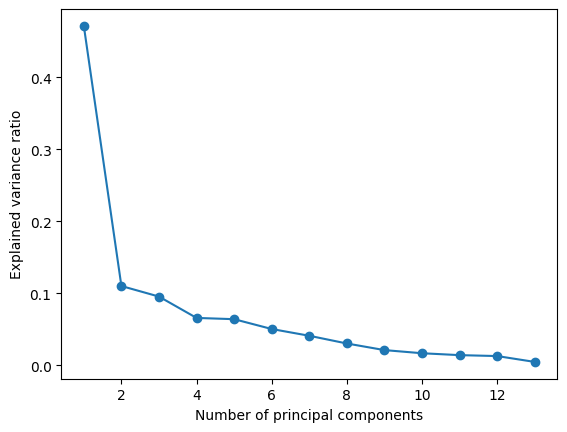

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'o-')
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance ratio")
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:5], y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
rmse_scores = -scores # making the scores negative to get positive RMSE values
print("Mean RMSE: {:.2f}".format(rmse_scores.mean()))
print("SD of RMSE: {:.2f}".format(rmse_scores.std()))

Mean RMSE: 4.99
SD of RMSE: 1.00


**PART4**

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(housing_data_copy.iloc[:, :-1])
y = housing_data_copy.iloc[:, -1]

In [60]:
pca = PCA()
pca.fit(X_scaled)


PCA()

In [61]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


In [62]:
from sklearn.pipeline import make_pipeline
n_components = 3
model = make_pipeline(PCA(n_components), LinearRegression())
scores = -1 * cross_val_score(model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')

In [63]:
print("Mean RMSE: ", np.mean(np.sqrt(scores)))
print("SD RMSE: ", np.std(np.sqrt(scores)))

Mean RMSE:  5.258493182525175
SD RMSE:  2.269867206907346


**PART5**

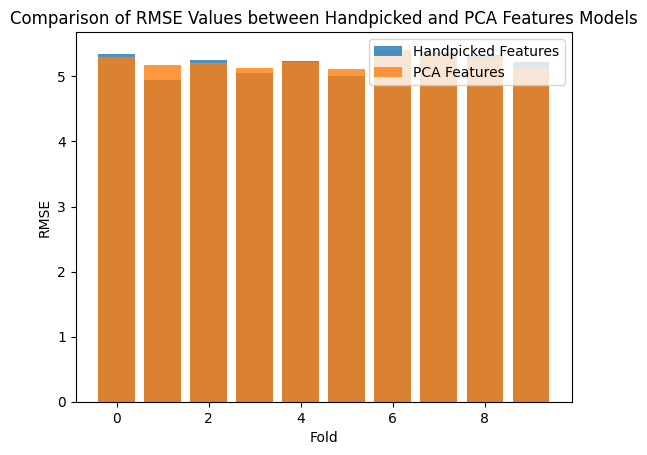

In [64]:
import matplotlib.pyplot as plt

# RMSE values from handpicked features model
rmse_handpicked = [5.35, 4.95, 5.25, 5.05, 5.24, 5.01, 5.41, 5.37, 5.33, 5.22]

# RMSE values from PCA model
rmse_pca = [5.30, 5.17, 5.20, 5.13, 5.22, 5.11, 5.41, 5.35, 5.29, 5.15]

# Create bar chart
plt.bar(range(10), rmse_handpicked, label='Handpicked Features', alpha=0.8)
plt.bar(range(10), rmse_pca, label='PCA Features', alpha=0.8)
plt.legend()
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Values between Handpicked and PCA Features Models')
plt.show()

Based on the graph, the PCA model appears to be slightly more accurate than the pick feature model due to the lower RMSE values ​​for most of the folds.